# Case Study - Credit Evaluation
we can measure the risk in extending credit by considering the desire and ability that the customer would like to pay the debts. Also may consider the financial strength, asset and company’s economic circumstances. So if a company has very healthy finance status, also it desired to pay debts, then the risk in extending credit is low,otherwise, the risk may be high. Based on different risk, the seller can further apply different terms on the given credit.

In [1]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/farm-credit/Farm_Credit.csv


In [2]:
df = pd.read_csv('/kaggle/input/farm-credit/Farm_Credit.csv')
print(df.head())

# remove the ID
df = df.drop('ID', axis=1)
data = df
print(data.shape)

   ID     FARM      ORDER  NET_INCOME    FR1    FR2    FR3    FR4    FR5
0   1  303.781   69690.13    7863.858  2.978  0.551  0.634  0.670  0.345
1   2  427.283  102026.70    9329.172  2.048  0.377  0.748  0.519  0.766
2   3  498.330  121168.40   12726.490  3.224  0.319  0.478  0.238  0.728
3   4  440.687   96448.44    5988.046  3.938  0.482  0.350  0.086  0.326
4   5  448.567  105942.00    6502.307  2.616  0.450  0.621  0.133  0.345
(30, 8)


/tmp/ipykernel_17/504716210.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


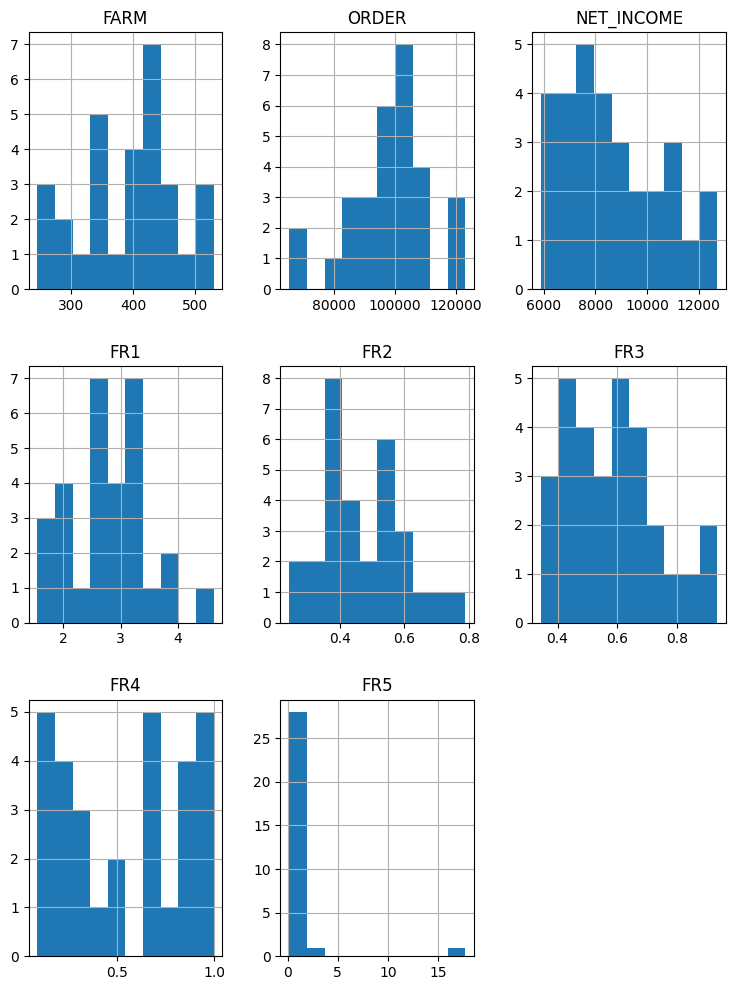

,FARM,ORDER,NET_INCOME,FR1,FR2,FR3,FR4,FR5
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,393.917600,98468.562667,8633.256267,2.823667,0.469567,0.585033,0.540833,1.129167
std,78.289674,13395.685288,1888.390191,0.709010,0.129205,0.157296,0.315499,3.168304
min,245.341000,65274.380000,5901.957000,1.549000,0.244000,0.345000,0.086000,0.160000
25%,346.662500,91051.577500,7163.687000,2.314000,0.371750,0.451750,0.244750,0.334500
50%,414.633500,99886.120000,8284.986000,2.840500,0.454000,0.575500,0.576000,0.415000
75%,441.954500,105367.500000,9912.269750,3.239000,0.552500,0.677500,0.847750,0.721750
max,530.354000,123144.000000,12726.490000,4.616000,0.789000,0.936000,0.997000,17.751000


In [3]:
from matplotlib import pyplot as plt
# histograms of the variables
fig = plt.figure(figsize = (9,12))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

#statistics description
data.describe()

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data)
data = scaler.transform(data)
data = pd.DataFrame(data)

data.describe()

''' data.describe() method in the Python pandas library generates descriptive statistics that 
summarize the central tendency, dispersion, and shape of a dataset's distribution. 
'''

" data.describe() method in the Python pandas library generates descriptive statistics that \nsummarize the central tendency, dispersion, and shape of a dataset's distribution. \n"

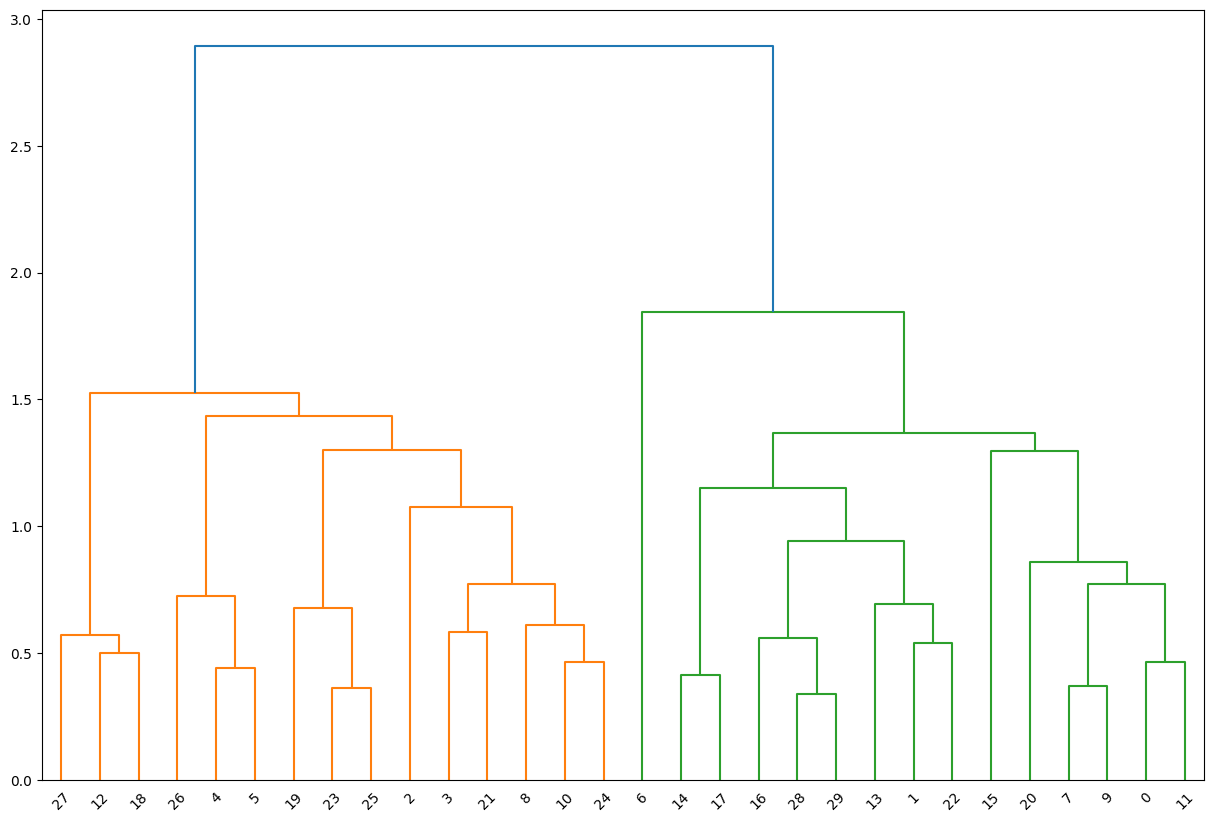

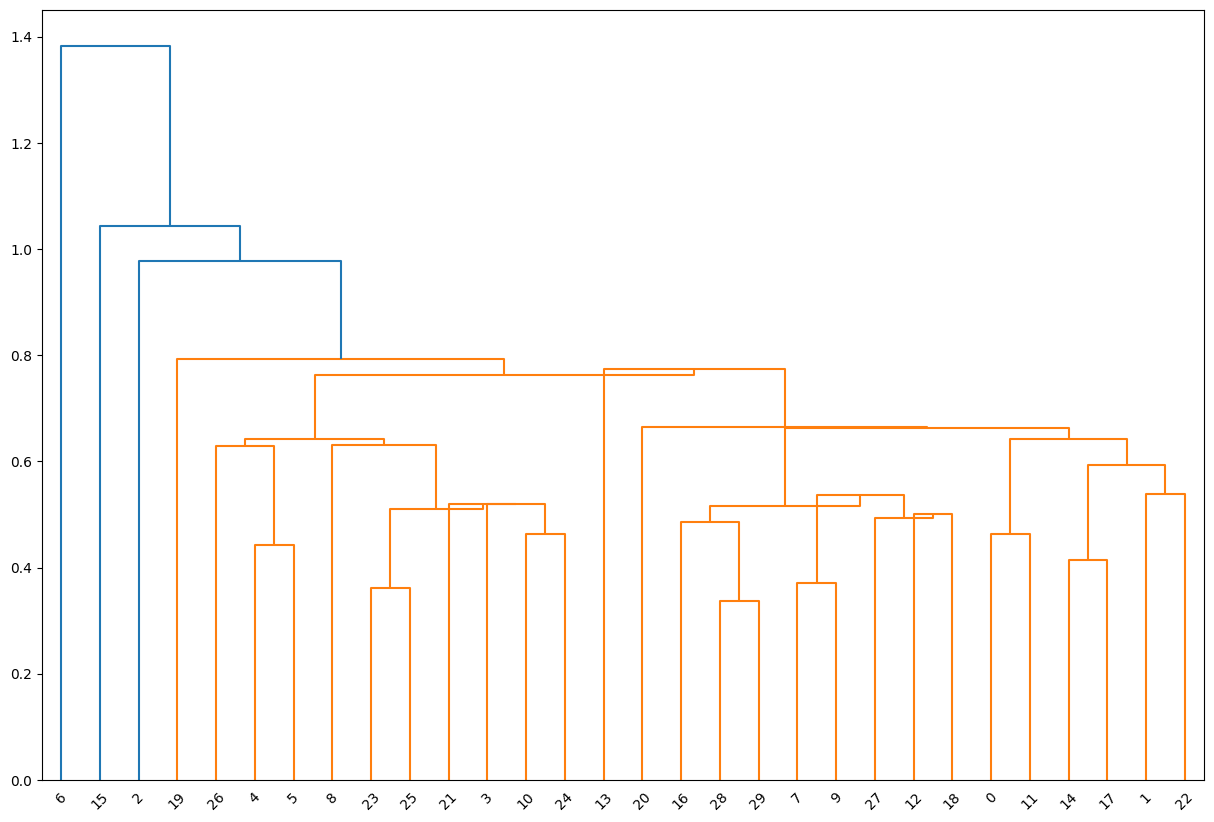

In [5]:
#Construct hierarchical clustering solutions using Scipy library

from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt

#use ward's linkage method, with Euclidean distance
'''
Note: ward, centroid, and median linkage methods provided by SciPy
only support Euclidean distance
'''
Z = linkage(data, 'ward', 'euclidean')
fig = plt.figure(figsize=(15, 10))
dn = dendrogram(Z)

#use centroid linkage method, with Euclidean distance
Z = linkage(data, 'centroid', 'euclidean')
fig = plt.figure(figsize=(15, 10))
dn = dendrogram(Z)

plt.show()

SciPy also provide a visualization of the learning process, we call it dendrogram, it is a 
hierarchy figure to show the cluster merging step by step.

From the ward’s linkage solution, we can figure out there are two big groups, the left 
green ones, and the right side red ones. However, centroid linkage solution, it is hard 
to read very distinct clusters. So for this case, ward’s linkage solution is better.

# **Besides hierarchical clustering, k-means is also suitable for studying this case.**


In [6]:
#Construct K-means solutions using scikit-learn library

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 2

#sklearn kmeans uses Euclidean distance by default
kmeans_setting = KMeans(n_clusters=k, random_state=0)
kmeans = kmeans_setting.fit(data)

#Learned cluster centers
kmeans_cluster_centers = kmeans.cluster_centers_
print(kmeans_cluster_centers)
print()

#Label data using the trained k-means model
cluster_labels = kmeans.predict(data)

#Evaluate clustering performance using silhouette value
silhouette_avg = silhouette_score(data, cluster_labels)
print("when k =", k ,": silhouette value =", silhouette_avg)
print("cluster labels:",cluster_labels)

[[0.65751018 0.67029561 0.38580142 0.45037496 0.46678899 0.29060914
  0.3550494  0.02273037]
 [0.24887251 0.38021751 0.42905041 0.34607108 0.30807339 0.63722504
  0.78770582 0.11982264]]

when k = 2 : silhouette value = 0.2233694955280246
cluster labels: [1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0]


Here is the result, two cluster centers, silhouette value is around 0.22, and last row 
shows the cluster labels. We can see the sizes of the two clusters are 16 and 14, 
which is similar to the clustering solution of Ward’s linkage. 

In [7]:
#cluster profile

#read the original data to better understand the cluster profile
data_original = pd.read_csv('/kaggle/input/farm-credit/Farm_Credit.csv')
data_original = data_original.iloc[:, 1:]

# Using dataframe.insert() to add a cluster column
data_original.insert(len(data_original.columns),"Cluster",cluster_labels,True)
#print(data_original.shape)
data_original.head()

,FARM,ORDER,NET_INCOME,FR1,FR2,FR3,FR4,FR5,Cluster
0,303.781,69690.13,7863.858,2.978,0.551,0.634,0.670,0.345,1
1,427.283,102026.70,9329.172,2.048,0.377,0.748,0.519,0.766,0
2,498.330,121168.40,12726.490,3.224,0.319,0.478,0.238,0.728,0
3,440.687,96448.44,5988.046,3.938,0.482,0.350,0.086,0.326,0
4,448.567,105942.00,6502.307,2.616,0.450,0.621,0.133,0.345,0


In [8]:
print("cluster-",0)
Cluster = data_original[data_original["Cluster"]==0]
Cluster.describe()

cluster- 0


,FARM,ORDER,NET_INCOME,FR1,FR2,FR3,FR4,FR5,Cluster
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,432.739950,104064.132500,8534.87155,2.930300,0.498400,0.516750,0.409450,0.559850,0.0
std,57.360079,10152.026684,1992.53900,0.594713,0.131026,0.122376,0.279604,0.501086,0.0
min,296.381000,86009.160000,5901.95700,1.800000,0.319000,0.345000,0.086000,0.160000,0.0
25%,414.692750,99286.327500,7066.03900,2.545750,0.375000,0.423250,0.172250,0.320750,0.0
50%,432.759000,104047.900000,7996.57550,3.053000,0.496000,0.491000,0.289000,0.407500,0.0
75%,450.250000,107682.600000,9617.68175,3.244000,0.579750,0.617250,0.636000,0.709250,0.0
max,530.354000,123144.000000,12726.49000,3.938000,0.789000,0.748000,0.996000,2.481000,0.0


In [9]:
print("cluster-",1)
Cluster = data_original[data_original["Cluster"]==1]
Cluster.describe()

cluster- 1


,FARM,ORDER,NET_INCOME,FR1,FR2,FR3,FR4,FR5,Cluster
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.0
mean,316.272900,87277.423000,8830.025700,2.610400,0.411900,0.72160,0.803600,2.267800,1.0
std,52.498713,12324.563413,1744.824507,0.892931,0.109571,0.13048,0.201541,5.445574,0.0
min,245.341000,65274.380000,6257.719000,1.549000,0.244000,0.53700,0.319000,0.329000,1.0
25%,269.167000,81082.215000,7945.375750,2.110750,0.371750,0.63550,0.721000,0.360500,1.0
50%,318.063000,90683.120000,8535.301000,2.447000,0.381500,0.67700,0.865000,0.518000,1.0
75%,348.061500,95637.645000,9792.713250,2.902750,0.518750,0.82975,0.929750,0.757000,1.0
max,398.044000,103371.600000,11815.550000,4.616000,0.551000,0.93600,0.997000,17.751000,1.0


Observing the five financial ratios of the 2 cluster, Cluster 0 has higher FR 1 value and Lower FRS 3, FR4 , FR5 values and similar FR2 value when compared to Cluster 1

Cluster 0 = Acceptable orders
Cluster 1 = Problematic orders

when k = 2 :silhouette value= 0.2233694955280246
when k = 3 :silhouette value= 0.1515048019490313
when k = 4 :silhouette value= 0.17039220065259825
when k = 5 :silhouette value= 0.13920790748192
when k = 6 :silhouette value= 0.07692592462548996
when k = 7 :silhouette value= 0.08730916960042331
when k = 8 :silhouette value= 0.11090504396976417
when k = 9 :silhouette value= 0.09909536247692798
when k = 10 :silhouette value= 0.10917328143497924
when k = 11 :silhouette value= 0.10468950671052428
when k = 12 :silhouette value= 0.10114675476849153
when k = 13 :silhouette value= 0.09897650533154927
when k = 14 :silhouette value= 0.1090588104744675
when k = 15 :silhouette value= 0.10537226159881846



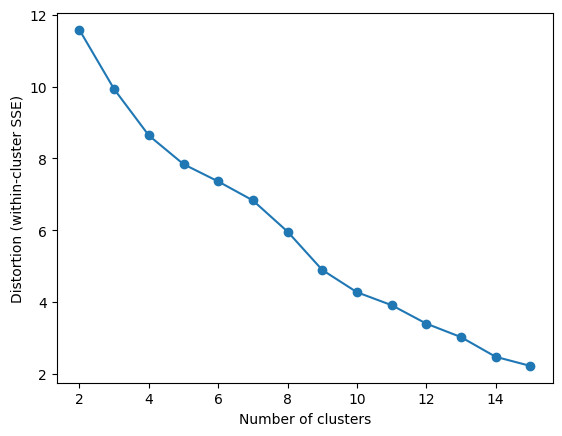

In [10]:
#What is the optimal k value?
#Try different k values, and plot the elbow line

distortions = []

for k in range(2,16):

    kmeans_setting = KMeans(n_clusters=k, random_state=0)
    kmeans = kmeans_setting.fit(data)

    #calculate the within cluster SSE: Sum of Squared errors of
    #samples to their closest cluster center.
    distortions.append(kmeans.inertia_)

    #Label data using the trained k-means model
    cluster_labels = kmeans.predict(data)

    #Evaluate clustering performance using silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("when k =",k,":silhouette value=", silhouette_avg)

print()

#plot elbow line
fig = plt.figure()
plt.plot(range(2,16), distortions,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion (within-cluster SSE)")
plt.show()

The Silhouette Score measures how well-separated and compact your clusters are on a scale from -1 to +1

The value with the highest average Silhouette Score is generally considered the most appropriate.

The Elbow Method looks for the "point of diminishing returns" where the within-cluster sum of squares (WCSS) stops dropping sharply.

The "Elbow": In your diagram, the line drops steeply from to, and then the bend (the "elbow") occurs around k=4 or k=5.

The Strategy:
Use the Elbow Method to narrow down a small range (e.g., k = 3 to k = 6).
Use the Silhouette Score within that range to pinpoint the best one.

If we combine these two measures, we can see, along with the k value increasing, the silhouette score is decreasing in general, the SSE is also decreasing. If we also consider the data size, 30 data objects, so seems like K=2 or k=3 would be a better selection.